#2.Métodos de Inicialização de Pesos

Os métodos de inicialização de pesos em redes neurais são técnicas utilizadas para definir os valores iniciais dos parâmetros de uma rede antes do treinamento.

A escolha da inicialização pode impactar diretamente a convergência do modelo, afetando a estabilidade do gradiente e a velocidade de aprendizado. Inicializações inadequadas podem levar a problemas como gradientes desaparecendo (vanishing gradients) ou gradientes explosivos (exploding gradients), dificultando o treinamento da rede.




##Como mitigar esses problemas?
Para mitigar esses problemas, diferentes estratégias foram desenvolvidas, como inicialização aleatória, Xavier/Glorot, He e até inicialização zero (que, apesar de ser um caso extremo, exemplifica a importância de um bom método).

O objetivo principal dessas abordagens é garantir que os pesos sejam pequenos o suficiente para evitar explosões de gradientes, mas suficientemente diversos para que diferentes neurônios aprendam representações distintas dos dados.

##Inicialização Aleatória

A inicialização aleatória de pesos é uma das estratégias mais simples utilizadas para definir os valores iniciais dos parâmetros em redes neurais antes do treinamento. Seu principal objetivo é evitar a simetria entre os neurônios, garantindo que cada um aprenda diferentes padrões dos dados. Se todos os pesos fossem inicializados com zero, os neurônios dentro de uma mesma camada receberiam gradientes idênticos, tornando-se redundantes e limitando a capacidade da rede. Para evitar esse problema, os pesos podem ser gerados aleatoriamente a partir de distribuições uniformes ou normais (gaussianas). Na distribuição uniforme, os pesos são amostrados dentro de um intervalo
[
−
𝑟
,
𝑟
]
, enquanto na distribuição normal, os pesos seguem uma distribuição gaussiana com média zero e um desvio padrão controlado.


##Possíveis desvantagens da Inicialização Aleatória
 No entanto, a inicialização aleatória pura pode causar problemas como gradientes explosivos (se os valores dos pesos forem muito grandes) ou gradientes desaparecendo (se forem muito pequenos), dificultando o treinamento da rede. Além disso, a escolha inadequada da distribuição pode interagir negativamente com funções de ativação como sigmoid e tanh, levando a saturação e reduzindo a eficiência da retropropagação. Por conta dessas limitações, métodos mais avançados, como Xavier/Glorot e He, foram desenvolvidos para ajustar dinamicamente os valores iniciais dos pesos de acordo com a arquitetura da rede, otimizando a propagação dos gradientes e melhorando a estabilidade do treinamento.

###Formulas



A inicialização aleatória de pesos em redes neurais é essencial para evitar a simetria entre os neurônios e permitir um aprendizado eficaz. Para isso, dois métodos comuns de geração de pesos são a distribuição uniforme e a distribuição normal (gaussiana). Ambas são utilizadas para definir valores iniciais dos pesos antes do treinamento da rede, mas cada uma tem suas características específicas e aplicações ideais.

##Distribuição Normal
A inicialização uniforme define os pesos
𝑊
W dentro de um intervalo
[
−
𝑟
,
𝑟
]
, onde todos os valores dentro desse intervalo têm a mesma probabilidade de serem escolhidos. A fórmula geral para a distribuição uniforme é:

𝑊
∼
𝑈
(
−
𝑟
,
𝑟
)

Isso significa que os pesos são amostrados de uma distribuição uniforme no intervalo definido. A função densidade de probabilidade (PDF) dessa distribuição é dada por:

$$\
P(W) =
\begin{cases}
\frac{1}{2r}, & \text{se } -r \leq W \leq r \\
0, & \text{caso contrário}
\end{cases}$$

Ou seja, todos os valores dentro do intervalo possuem a mesma probabilidade
$ \frac{1}{2r} $ , garantindo que os pesos sejam distribuídos de maneira uniforme.

O valor de
𝑟 pode ser determinado empiricamente ou definido com base no número de neurônios na camada. Se os pesos forem muito grandes, podem causar exploding gradients; se forem muito pequenos, podem levar a vanishing gradients.

Essa inicialização tem algumas vantagens e desvantagens, como as seguintes:

Vantagem: Simplicidade e controle explícito sobre o intervalo dos pesos.

Desvantagem: Pode não ser ideal para funções de ativação como sigmoid e tanh, pois não leva em conta a variação do gradiente.



##Distribuição Gaussiana
Outra abordagem comum é inicializar os pesos seguindo uma distribuição normal (gaussiana) com média zero e variância
$𝜎^2$
 , ou seja:

$𝑊∼𝑁(0,𝜎^2)$

A função densidade de probabilidade (PDF) para a distribuição normal é:

$$
P(W) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{W^2}{2\sigma^2}}
$$

Isso significa que os pesos estarão concentrados em torno da média 0, com maior probabilidade de assumir valores próximos de zero e menos probabilidade de assumir valores extremos.

Escolha de
𝜎
: O desvio padrão
𝜎
 precisa ser ajustado para garantir que os gradientes não sejam muito grandes nem muito pequenos.
Existem algumas vantagens desse método de iniciação, e desventagens, descritas a seguir:

Vantagem: Apresenta Variância do Gradiente equilibrada entre as camadas, Melhor compatibilidade com redes profundas e algumas funções de ativação, além de  resolver o problema de Simetria entre Neurônios ao atribuir pesos ligeiramente diferentes para cada neurônio, permitindo que cada um aprenda representações distintas.

Desvantagem: Pode ser sensível ao valor escolhido para
𝜎
σ, exigindo ajuste cuidadoso.

##Inicialização Xavier/Glorot



A inicialização Xavier/Glorot foi introduzida por **Xavier Glorot e Yoshua Bengio** em 2010, no artigo *Understanding the difficulty of training deep feedforward neural networks*. Esse método foi desenvolvido para resolver os problemas de vanishing gradients (gradientes desaparecendo) e exploding gradients (gradientes explodindo), que frequentemente ocorrem em redes neurais profundas.

O objetivo da inicialização Xavier é manter a variância dos pesos equilibrada ao longo das camadas da rede, garantindo que os gradientes não se tornem muito grandes nem muito pequenos à medida que propagam durante o treinamento. Essa abordagem permite que a rede aprenda de forma mais estável e eficiente.

Durante o treinamento de uma rede neural, os sinais são propagados para frente (forward pass) e para trás (backpropagation). Em cada camada, os pesos \( W \) e as ativações \( a \) são multiplicados, e as funções de ativação são aplicadas. Se os pesos forem muito grandes, os valores da ativação podem crescer exponencialmente, causando exploding gradients. Se os pesos forem muito pequenos, os gradientes diminuem drasticamente, resultando em vanishing gradients.

O método Xavier foi projetado para equilibrar a variância dos pesos de entrada e saída de cada camada, evitando que a escala dos valores aumente ou diminua excessivamente.

---

## Formulação Matemática da Inicialização Xavier

A ideia principal da inicialização Xavier é definir os pesos de uma camada de forma que a variância das ativações permaneça constante em cada camada. Isso significa que o desvio padrão dos pesos deve ser ajustado com base no número de neurônios da camada.

A inicialização Xavier define os pesos \( W \) de acordo com:

$$
W \sim U\left(-\frac{1}{\sqrt{n_{\text{in}}}}, \frac{1}{\sqrt{n_{\text{in}}}} \right)
$$

ou, na forma normal (gaussiana):

$$
W \sim N\left(0, \frac{1}{n_{\text{in}}} \right)
$$

Onde:
- $ n_{\text{in}} $ é o número de neurônios da camada anterior (número de entradas para a camada atual).
- A versão **uniforme** sorteia os pesos dentro de um intervalo simétrico.
- A versão **gaussiana** (normal) sorteia os pesos com média 0 e variância  $\frac{1}{n_{\text{in}}} $.

Essas equações garantem que a propagação dos sinais permaneça estável ao longo das camadas.

---

## Como Xavier Equilibra os Gradientes?

A justificativa matemática para essa inicialização vem do desejo de manter a **variância da ativação \( a \)** constante em cada camada. Durante o **forward pass**, queremos evitar que os valores das ativações cresçam ou diminuam excessivamente:

$$
\text{Var}(a) = \text{Var}(W \cdot a_{\text{in}}) = \text{Var}(W) \cdot \text{Var}(a_{\text{in}})
$$

Se a variância de \( W \) for muito grande, os valores da ativação podem crescer a cada camada. Se for muito pequena, os valores da ativação diminuem. Para garantir uma propagação equilibrada, Xavier define a variância dos pesos de modo que a entrada e saída de cada camada tenham valores próximos.

---

## Versões da Inicialização Xavier

###  Xavier Uniforme
$$
W \sim U\left(-\frac{1}{\sqrt{n_{\text{in}}}}, \frac{1}{\sqrt{n_{\text{in}}}} \right)
$$

Os pesos são amostrados de uma distribuição **uniforme** dentro do intervalo calculado. Essa versão é mais usada quando a função de ativação não possui regiões de saturação severa.

###  Xavier Normal (Gaussiana)
$$
W \sim N\left(0, \frac{1}{n_{\text{in}}} \right)
$$

Os pesos são amostrados de uma **distribuição normal** com média 0 e variância $ \frac{1}{n_{\text{in}}} $. Essa abordagem pode ser útil para funções de ativação que se beneficiam de uma distribuição mais concentrada ao redor da média.

---

## Quando Usar Xavier?

A inicialização Xavier é ideal para **funções de ativação simétricas**, como:
- **Sigmoid**
- **Tanh**

Essas funções podem sofrer com saturação se os pesos iniciais forem muito grandes. A inicialização Xavier ajuda a evitar esse problema, garantindo que as ativações iniciais estejam na faixa apropriada para o aprendizado.

---




##Inicialização He

A inicialização He, também conhecida como Kaiming Initialization, foi introduzida por Kaiming He e colaboradores em 2015, no artigo Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification. Esse método foi desenvolvido para otimizar redes neurais profundas que utilizam a função de ativação ReLU (Rectified Linear Unit) e suas variantes, como Leaky ReLU e Parametric ReLU.

##Objetivo

O objetivo da inicialização He é ajustar a escala dos pesos de modo que a variância das ativações seja preservada ao longo das camadas, garantindo uma propagação estável dos gradientes. Esse método ajuda a evitar o problema dos vanishing gradients (gradientes desaparecendo) e exploding gradients (gradientes explodindo), comuns em redes profundas.

Durante o treinamento de uma rede neural, os sinais passam para frente (forward pass) e para trás (backpropagation). Como a função ReLU anula metade das ativações ao definir
𝑓
(
𝑥
)
=
max
⁡
(
0
,
𝑥
)
f(x)=max(0,x), a inicialização He ajusta a variância dos pesos para compensar essa perda de informação.

O método He foi projetado para garantir que os valores das ativações não diminuam nem aumentem drasticamente conforme passam pelas camadas da rede.

##Formulação Matemática da Inicialização He
A ideia central da inicialização He é definir os pesos de cada camada de forma que a variância da ativação seja mantida durante a propagação da rede. Para isso, o desvio padrão dos pesos deve ser ajustado com base no número de neurônios da camada de entrada.

A inicialização He define os pesos
𝑊 de acordo com:
$$
W \sim U\left(-\sqrt{\frac{2}{n_{\text{in}}}}, \sqrt{\frac{2}{n_{\text{in}}}} \right)
$$
ou na versão Gaussiana, que é :
$$
W \sim N\left(0, \frac{2}{n_{\text{in}}} \right)
$$
Onde:

* $𝑛_{\text{in}}$ é o número de neurônios da camada anterior (entrada da camada atual).

* A versão uniforme sorteia os pesos dentro de um intervalo simétrico.





* A versão gaussiana (normal) sorteia os pesos com média 0 e variância
$\frac2 {n_{\text{in}}}$

O fator
2 na equação compensa a perda de ativação que ocorre devido à natureza da função ReLU.

Essas equações garantem que os gradientes permaneçam estáveis ao longo das camadas, permitindo que redes profundas aprendam de forma eficiente.

##Como o He Equilibra os Gradientes?

A justificativa matemática para essa inicialização vem do objetivo de manter a variância da ativação
𝑎
a constante em cada camada. Durante o forward pass, queremos evitar que os valores das ativações cresçam ou diminuam excessivamente:
$$\text{Var}(a) = \text{Var}(W \cdot a_{\text{in}}) = \text{Var}(W) \cdot \text{Var}(a_{\text{in}})$$

No caso da função ReLU, onde a metade das ativações são zeradas
E
[
𝑓
(
𝑥
)
]
=
0.5
𝑥
, a variância das ativações diminui. Para compensar essa redução, a inicialização He ajusta a variância dos pesos para:

$$\text{Var}(W) = \frac{2}{n_{\text{in}}}$$

Isso garante que os sinais não desapareçam nem explodam conforme propagam pela rede.

##Versões da Inicialização He

###He Uniforme


$$W \sim U\left(-\sqrt{\frac{2}{n_{\text{in}}}}, \sqrt{\frac{2}{n_{\text{in}}}} \right)$$
Os pesos são amostrados de uma distribuição uniforme dentro do intervalo definido. Essa versão é útil quando se deseja limitar os pesos dentro de um intervalo fixo.


###He Normal (Gaussiana)


$$W \sim N\left(0, \frac{2}{n_{\text{in}}} \right)$$
Os pesos são amostrados de uma distribuição normal com média 0 e variância $\frac2 {n_{\text{in}}}$ . Essa abordagem é mais comum, pois distribuições gaussianas tendem a representar melhor os pesos iniciais de redes profundas.



##Quando Usar He?

A inicialização He é ideal para funções de ativação que não são simétricas, como:

* ReLU
* Leaky ReLU
* Parametric ReLU (PReLU)

Essas funções de ativação zeram metade das ativações, tornando a inicialização Xavier menos eficiente. A inicialização He resolve esse problema, garantindo que os gradientes sejam propagados de forma equilibrada.

##Inicialização Zero

A inicialização Zero é uma técnica onde todos os pesos da rede neural são inicializados com o valor zero. Embora essa abordagem possa parecer razoável, na maioria dos casos, ela não é recomendada devido ao problema de redes degeneradas, onde todos os neurônios de uma camada aprendem exatamente os mesmos pesos, tornando a rede ineficaz.



##Possíveis Usos
No entanto, existem alguns casos específicos onde a inicialização zero pode ser usada de maneira controlada, principalmente em camadas específicas de algumas arquiteturas avançadas

##Problema da Simetria dos neurônios
Em redes neurais, os pesos são atualizados durante o backpropagation, e cada neurônio deve aprender representações distintas dos dados. Se todos os pesos forem inicializados com zero, todos os neurônios de uma mesma camada:

* Receberão os mesmos gradientes durante a retropropagação.
* Serão atualizados de maneira idêntica.
* Aprenderão os mesmos padrões, tornando-se redundantes.

A rede se comportará como um modelo linear, perdendo sua capacidade de aprendizado profundo.

Isso significa que a rede não conseguirá aprender representações complexas, pois todos os neurônios da mesma camada se tornarão equivalentes.

###Exemplo Matemático
Se a saída de uma camada totalmente conectada for dada por:

$$𝑍=𝑊𝑋+𝑏$$
Onde:

𝑊 é a matriz de pesos,
𝑋 é a entrada da camada,
𝑏 é o bias.

Se todos os pesos
𝑊 forem zero, então a saída da camada será:

$$𝑍=0𝑋+𝑏=𝑏$$

Ou seja, a única coisa que pode mudar o aprendizado é o bias, tornando a rede quase ineficaz, pois os pesos não terão influência na saída.



##Usos da Inicialização  Zero
Apesar dos problemas mencionados, a inicialização zero pode ser utilizada em casos específicos, como:

* Inicialização de Biases

Em muitas redes neurais, os pesos são inicializados aleatoriamente, mas os bias podem ser inicializados como zero sem causar problemas.
Isso ocorre porque o bias adiciona um deslocamento fixo na ativação do neurônio e não sofre com o problema da simetria dos pesos.

* Algumas Camadas Específicas em Redes Convolucionais (CNNs)

Em arquiteturas profundas de CNNs, a inicialização zero pode ser usada nas camadas finais para estabilizar a rede no início do treinamento.
Algumas técnicas avançadas de regularização podem mitigar os efeitos negativos.
* Modelos Pré-Treinados

Em redes neurais que já foram pré-treinadas, algumas camadas podem ser inicializadas com zero ao realizar fine-tuning, desde que os pesos da maioria das camadas tenham sido previamente aprendidos.

##Comparação Com Experimento

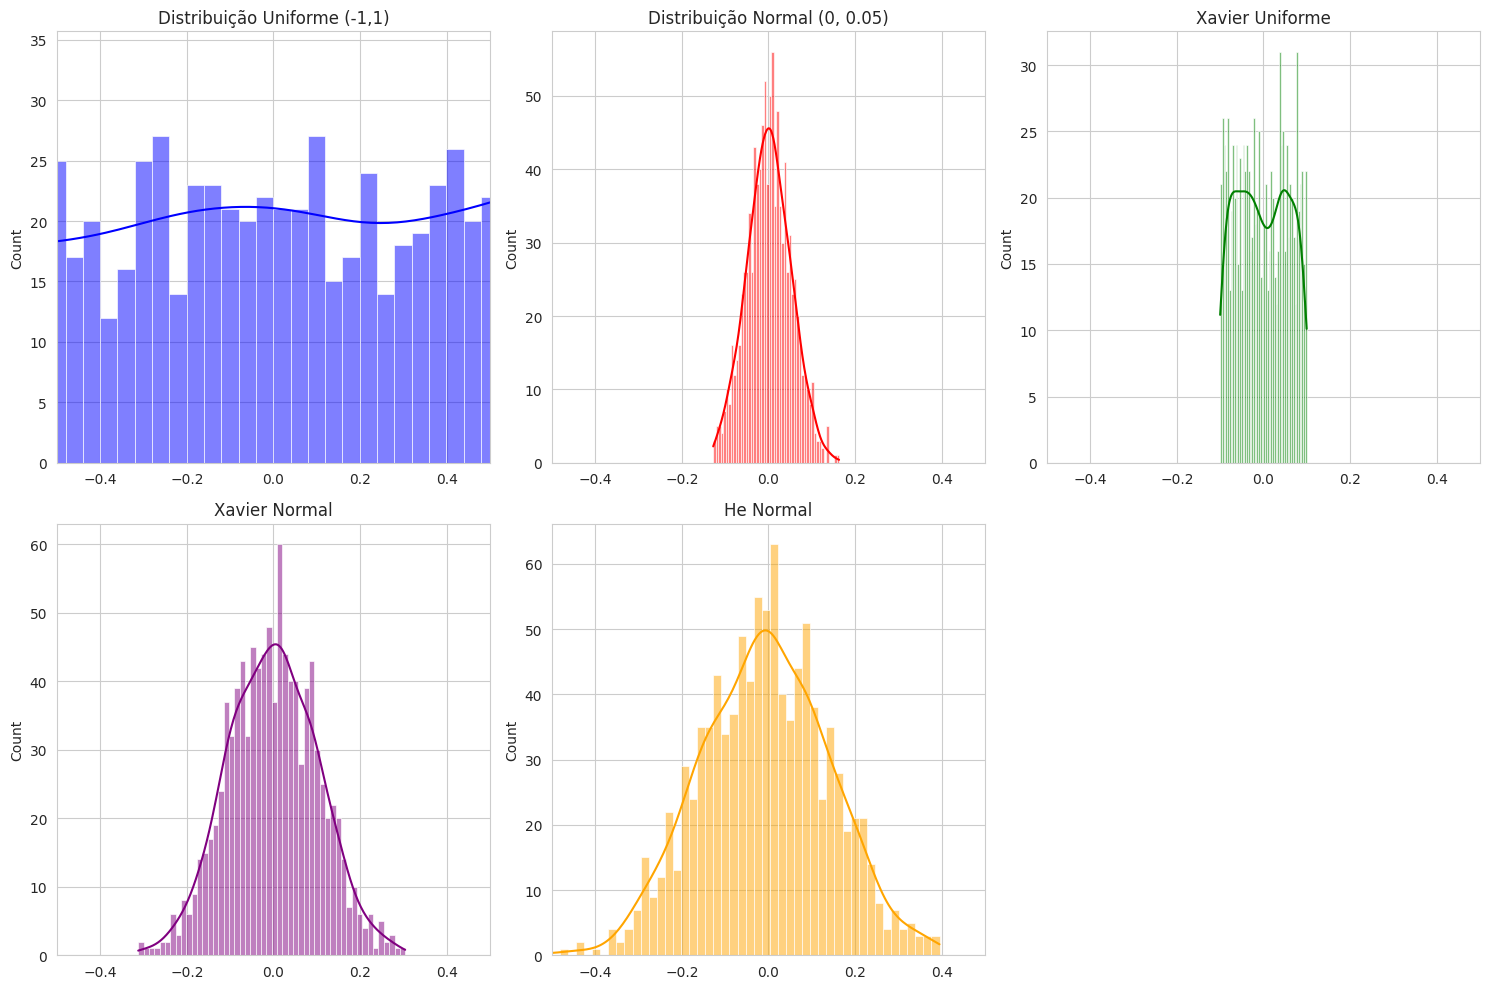

In [13]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool
from bokeh.io import push_notebook
from bokeh.models import Select
from bokeh.layouts import column



# Configuração do estilo dos gráficos
sns.set_style("whitegrid")

# Definição dos parâmetros
num_pesos = 1000  # Quantidade de pesos a serem gerados
n_in = 100  # Número de neurônios na camada de entrada
limite_x = (-0.5, 0.5)  # Limite fixo para todos os gráficos

# Inicialização dos Pesos
pesos_uniform = np.random.uniform(-1, 1, num_pesos)
pesos_normal = np.random.normal(0, 0.05, num_pesos)
limite_xavier = 1 / np.sqrt(n_in)
pesos_xavier = np.random.uniform(-limite_xavier, limite_xavier, num_pesos)
pesos_xavier_normal = np.random.normal(0, 1 / np.sqrt(n_in), num_pesos)
pesos_he = np.random.normal(0, np.sqrt(2 / n_in), num_pesos)

# Criando Gráficos com Matplotlib para Visualizar as Distribuições
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Função para padronizar os gráficos
def plot_hist(ax, data, title, color):
    sns.histplot(data, bins=50, kde=True, ax=ax, color=color)
    ax.set_title(title)
    ax.set_xlim(limite_x)  # Definir limite fixo para o eixo X

# Criando os subgráficos
plot_hist(axes[0, 0], pesos_uniform, "Distribuição Uniforme (-1,1)", "blue")
plot_hist(axes[0, 1], pesos_normal, "Distribuição Normal (0, 0.05)", "red")
plot_hist(axes[0, 2], pesos_xavier, "Xavier Uniforme", "green")
plot_hist(axes[1, 0], pesos_xavier_normal, "Xavier Normal", "purple")
plot_hist(axes[1, 1], pesos_he, "He Normal", "orange")

# Remover eixo extra
axes[1, 2].axis('off')

# Ajuste da disposição dos gráficos
plt.tight_layout()
plt.show()

# Criando Gráfico Interativo com Bokeh
output_notebook()

# Criando um histograma para cada distribuição
hist_uniform, edges_uniform = np.histogram(pesos_uniform, bins=50, range=limite_x)
hist_normal, edges_normal = np.histogram(pesos_normal, bins=50, range=limite_x)
hist_xavier, edges_xavier = np.histogram(pesos_xavier, bins=50, range=limite_x)
hist_xavier_normal, edges_xavier_normal = np.histogram(pesos_xavier_normal, bins=50, range=limite_x)
hist_he, edges_he = np.histogram(pesos_he, bins=50, range=limite_x)

# Criando a figura
p = figure(title="Comparação das Inicializações de Pesos",
           x_axis_label="Valor dos Pesos", y_axis_label="Frequência",
           width=800, height=500)

# Adicionando os histogramas em camadas para comparação
p.quad(top=hist_uniform, bottom=0, left=edges_uniform[:-1], right=edges_uniform[1:],
       fill_alpha=0.3, color="blue", legend_label="Uniforme (-1,1)")

p.quad(top=hist_normal, bottom=0, left=edges_normal[:-1], right=edges_normal[1:],
       fill_alpha=0.3, color="red", legend_label="Normal (0, 0.05)")

p.quad(top=hist_xavier, bottom=0, left=edges_xavier[:-1], right=edges_xavier[1:],
       fill_alpha=0.3, color="green", legend_label="Xavier Uniforme")

p.quad(top=hist_xavier_normal, bottom=0, left=edges_xavier_normal[:-1], right=edges_xavier_normal[1:],
       fill_alpha=0.3, color="purple", legend_label="Xavier Normal")

p.quad(top=hist_he, bottom=0, left=edges_he[:-1], right=edges_he[1:],
       fill_alpha=0.3, color="orange", legend_label="He Normal")

# Configurações do gráfico interativo
p.legend.location = "top_right"
p.add_tools(HoverTool())


# Exibir gráfico no Jupyter Notebook
show(p, notebook_handle=True)




#3.Impacto da Inicialização de Pesos



A inicialização de pesos desempenha um papel fundamental no desempenho das redes neurais, influenciando diretamente a convergência do modelo, a estabilidade do treinamento e a qualidade do aprendizado. Uma inicialização inadequada pode levar a problemas como exploding gradients (gradientes explodindo) e vanishing gradients (gradientes desaparecendo), dificultando o aprendizado da rede e comprometendo sua eficiência.

##Importância da inicialização de pesos


A inicialização dos pesos é um dos fatores mais críticos para o sucesso do treinamento de uma rede neural. Uma boa inicialização permite que a rede aprenda de maneira eficiente, enquanto uma má inicialização pode dificultar ou até impedir o aprendizado. Os principais motivos pelos quais a inicialização de pesos é importante incluem:

###Prevenção de Vanishing e Exploding Gradients
Se os pesos iniciais forem muito pequenos, os gradientes podem diminuir exponencialmente ao longo das camadas, resultando em vanishing gradients, onde a rede não consegue atualizar seus pesos corretamente. Por outro lado, se os pesos forem muito grandes, os gradientes podem explodir, tornando o treinamento instável.

###Aceleração da Convergência
Uma inicialização bem escolhida ajuda a rede a convergir mais rapidamente para um ótimo local da função de perda. Isso reduz a necessidade de ajustes manuais na taxa de aprendizado e evita longos tempos de treinamento.

### Evita Redes Degeneradas
Como visto na Inicialização Zero, se os pesos forem inicializados incorretamente, todos os neurônios de uma mesma camada podem aprender os mesmos valores, resultando em uma rede neural redundante, que se comporta como um modelo linear e perde sua capacidade de aprendizado.

###Compatibilidade com Funções de Ativação

Diferentes funções de ativação possuem comportamentos distintos. Métodos como Xavier são ideais para sigmoid e tanh, pois mantêm a variância dos gradientes equilibrada, enquanto He Initialization é mais adequada para ReLU e suas variantes, compensando a perda de ativação

###Melhor Generalização
Uma inicialização adequada ajuda a rede a aprender representações mais diversas e generalizáveis, evitando que o modelo fique preso em mínimos locais ruins ou que aprenda padrões irrelevantes dos dados.



##Problemas causados por inicialização inadequada:


A escolha incorreta da inicialização de pesos pode afetar significativamente o desempenho da rede neural, resultando em dificuldades de convergência, treinamento instável e baixa capacidade de aprendizado. Os principais problemas que surgem devido a uma inicialização inadequada são:

* Vanishing Gradients (Gradientes Desaparecendo)
* Exploding Gradients (Gradientes Explodindo)
* Redes Degeneradas (Neurônios Redundantes)
* Convergência Lenta ou Treinamento Ineficiente

###Gradientes explosivos (exploding gradients)


O problema de exploding gradients ocorre quando os gradientes se tornam muito grandes, fazendo com que os pesos da rede aumentem exponencialmente, tornando o treinamento instável.

* Causa:

Inicializar pesos muito grandes leva a ativações muito altas, resultando em gradientes que crescem exponencialmente na retropropagação.
Pode ocorrer em redes muito profundas, onde pequenos erros se acumulam camada após camada.

* Consequência:

O treinamento se torna instável e a função de perda pode oscilar violentamente.
A rede pode divergir, resultando em pesos extremamente altos ou NaN (não numéricos).

* Como Evitar?

Usar inicializações como He (Kaiming Initialization), que ajusta os pesos para redes com ReLU. Além disso, pode-se aplicar Gradient Clipping, limitando o valor máximo dos gradientes ou utilizar Batch Normalization para manter os valores dentro de uma faixa segura.

###Gradientes desaparecendo (vanishing gradients)

Esse problema ocorre quando os gradientes se tornam extremamente pequenos durante a backpropagation, reduzindo a capacidade da rede de atualizar seus pesos e aprender padrões complexos.

* Causa

Inicializar pesos muito pequenos faz com que os gradientes diminuam rapidamente à medida que são propagados para trás nas camadas da rede.
Ocorre principalmente em redes profundas que utilizam funções de ativação sigmoid ou tanh, pois essas funções têm regiões onde os gradientes são quase zero.
* Consequência

A rede aprende muito devagar ou para completamente de aprender.
Camadas iniciais da rede ficam inúteis, pois os gradientes que chegam até elas são praticamente zero.

* Como Evitar?

Usar inicializações como Xavier/Glorot (mantém a variância dos gradientes equilibrada),
Utilizar ReLU ao invés de sigmoid/tanh, pois a ReLU reduz a chance de saturação,
ou Aplicar Batch Normalization, que ajuda a estabilizar os gradientes.



### Convergência Lenta ou Treinamento Ineficiente

Se a inicialização não for apropriada, a rede pode demorar muito para aprender, mesmo que os gradientes não desapareçam nem explodam.

* Causa

Inicializar pesos com variâncias mal escolhidas pode fazer com que os valores de ativação demorem a entrar na faixa de aprendizado ideal.
Ademais, uma inicialização muito conservadora (com pesos pequenos demais) pode resultar em passos de atualização muito pequenos durante o treinamento.

* Consequência

A rede pode precisar de muitas épocas para aprender um padrão simples.
O modelo pode precisar de taxas de aprendizado muito altas, o que pode gerar instabilidade.

* Como Evitar?

 Usar inicializações apropriadas como He (para ReLU) ou Xavier (para Sigmoid/Tanh). Além disso, pode-se ajustar a taxa de aprendizado junto com a inicialização dos pesos e utilizar schedulers de taxa de aprendizado, como StepLR ou CosineAnnealing.

##Testes práticos comparando os métodos de inicialização

Esse código implementa um experimento comparando diferentes métodos de inicialização de pesos em uma rede neural MLP treinada no dataset MNIST. O objetivo é avaliar como a inicialização afeta a convergência e o desempenho da rede.

Ademais, no código abaixo, a Inicialização Aleatória foi descrita como "default".


Treinando com default...

Inicialização: default | Época [1/10], Loss: 1.4731
Inicialização: default | Época [2/10], Loss: 0.5148
Inicialização: default | Época [3/10], Loss: 0.3916
Inicialização: default | Época [4/10], Loss: 0.3488
Inicialização: default | Época [5/10], Loss: 0.3235
Inicialização: default | Época [6/10], Loss: 0.3048
Inicialização: default | Época [7/10], Loss: 0.2892
Inicialização: default | Época [8/10], Loss: 0.2755
Inicialização: default | Época [9/10], Loss: 0.2633
Inicialização: default | Época [10/10], Loss: 0.2517

Treinando com xavier...

Inicialização: xavier | Época [1/10], Loss: 0.6798
Inicialização: xavier | Época [2/10], Loss: 0.3487
Inicialização: xavier | Época [3/10], Loss: 0.3002
Inicialização: xavier | Época [4/10], Loss: 0.2712
Inicialização: xavier | Época [5/10], Loss: 0.2483
Inicialização: xavier | Época [6/10], Loss: 0.2309
Inicialização: xavier | Época [7/10], Loss: 0.2154
Inicialização: xavier | Época [8/10], Loss: 0.2023
Inicialização: xav

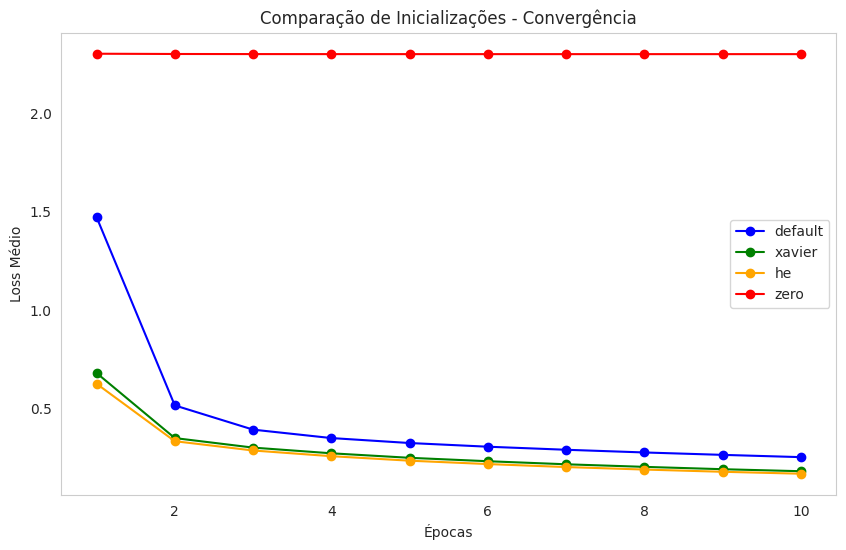

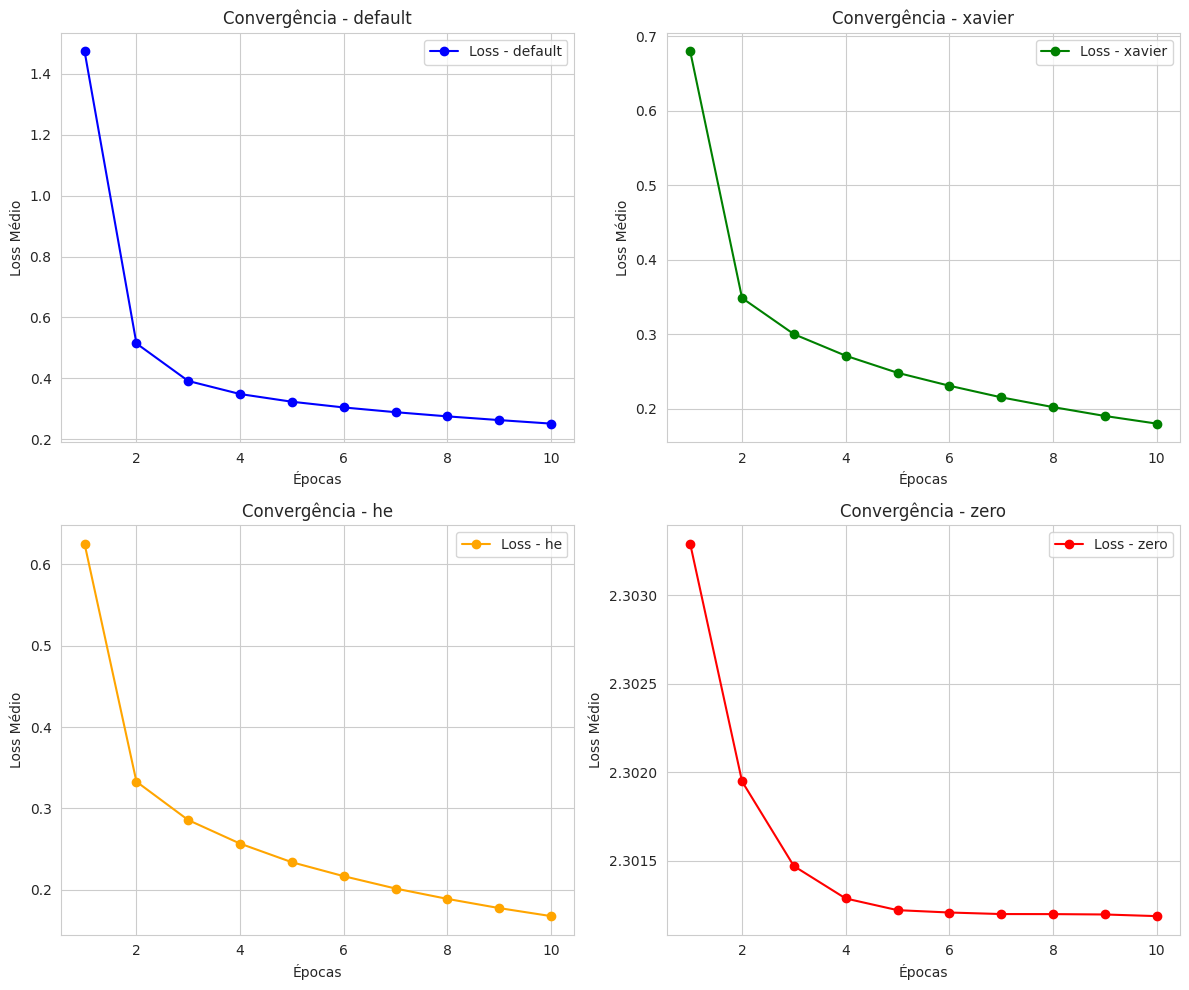

In [21]:
# Reimportando as bibliotecas necessárias após o reset do estado
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Definir a semente para garantir reprodutibilidade
def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    torch.cuda.manual_seed_all(seed)

# Definição dos hiperparâmetros
batch_size = 128
learning_rate = 0.01
epochs = 10
seed_value = 42  # Valor da semente

# Transformação e carregamento do dataset MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Definição da rede neural
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Aplicação das inicializações
def init_weights(model, init_method):
    if init_method == "xavier":
        nn.init.xavier_uniform_(model.fc1.weight)
        nn.init.xavier_uniform_(model.fc2.weight)
        nn.init.xavier_uniform_(model.fc3.weight)
    elif init_method == "he":
        nn.init.kaiming_uniform_(model.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(model.fc2.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(model.fc3.weight, nonlinearity='relu')
    elif init_method == "zero":
        nn.init.zeros_(model.fc1.weight)
        nn.init.zeros_(model.fc2.weight)
        nn.init.zeros_(model.fc3.weight)

# Função para treinar a rede neural
def train_model(init_method):
    set_seed(seed_value)  # Garante que cada modelo inicie com a mesma semente
    model = MLP()
    init_weights(model, init_method)  # Aplica a inicialização selecionada

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    train_losses = []

    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f"Inicialização: {init_method} | Época [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

    return train_losses

# Teste das diferentes inicializações
methods = ["default", "xavier", "he", "zero"]
loss_results = {}

for method in methods:
    print(f"\nTreinando com {method}...\n")
    loss_results[method] = train_model(method)

# Definindo cores diferentes para cada inicialização
colors = {
    "default": "blue",
    "xavier": "green",
    "he": "orange",
    "zero": "red"
}

# Gráfico Único Comparando Todas as Inicializações
plt.figure(figsize=(10, 6))
for method, losses in loss_results.items():
    plt.plot(range(1, epochs+1), losses, marker='o', linestyle='-', label=method, color=colors.get(method, "black"))

plt.xlabel("Épocas")
plt.ylabel("Loss Médio")
plt.title("Comparação de Inicializações - Convergência")
plt.legend()
plt.grid()
plt.show()

# Criando Subplots Individuais para Cada Inicialização
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid para até 4 inicializações

methods_list = list(loss_results.keys())  # Lista com os nomes das inicializações

# Mapeando cada inicialização para um gráfico separado
for i, method in enumerate(methods_list):
    row, col = divmod(i, 2)  # Define a posição no subplot
    axes[row, col].plot(range(1, epochs+1), loss_results[method], marker='o', linestyle='-', label=f"Loss - {method}", color=colors.get(method, "black"))
    axes[row, col].set_xlabel("Épocas")
    axes[row, col].set_ylabel("Loss Médio")
    axes[row, col].set_title(f"Convergência - {method}")
    axes[row, col].legend()
    axes[row, col].grid(True)

# Removendo plots vazios (caso haja menos de 4 inicializações)
if len(methods_list) < 4:
    for i in range(len(methods_list), 4):
        fig.delaxes(axes.flatten()[i])

# Ajuste para melhor visualização
plt.tight_layout()
plt.show()



##Gráficos de convergência e impacto na performance

Para comparar o impacto da performace de cada inicialização, podemos reimpimir o gráfico comparativo abaixo

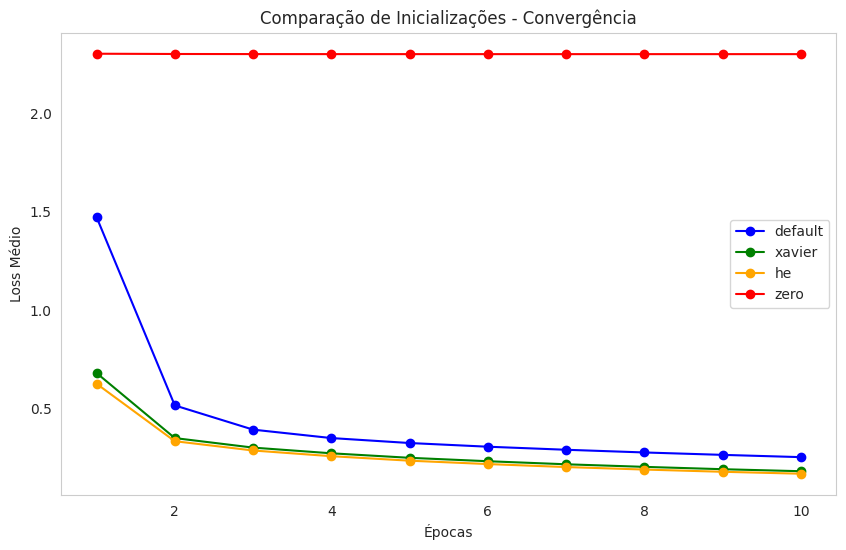

In [20]:
# Reimprimir o gráfico de convergência das inicializações
plt.figure(figsize=(10, 6))
for method, losses in loss_results.items():
    plt.plot(range(1, epochs+1), losses, marker='o', linestyle='-', label=method, color=colors.get(method, "black"))

plt.xlabel("Épocas")
plt.ylabel("Loss Médio")
plt.title("Comparação de Inicializações - Convergência")
plt.legend()
plt.grid()
plt.show()

O gráfico de convergência ilustra como diferentes métodos de inicialização afetam o desempenho do treinamento e a estabilidade da rede neural. A inicialização dos pesos influencia a rapidez com que a loss diminui, a estabilidade do aprendizado e a capacidade da rede de generalizar para novos dados. Vamos analisar cada inicialização separadamente com base nos resultados observados.

###He Initialization (Amarelo) 🟡
 Melhor desempenho e convergência mais rápida. Projetada para ReLU, evitando o problema de vanishing gradients. Mantém a variância dos gradientes equilibrada em redes profundas.
* Consequência:

Permite um treinamento mais eficiente e estável.
Evita que os gradientes desapareçam ou explodam.
Ideal para redes neurais profundas com ReLU ou variantes (Leaky ReLU, PReLU).
### Xavier Initialization (Verde) 🟢
Desempenho bom, mas ligeiramente inferior ao He.
Criada para funções sigmoid e tanh, mantendo os gradientes equilibrados.
Garante que as ativações não fiquem muito altas nem muito baixas.
* Consequência:

Funciona bem para funções sigmoides, mas pode não ser ideal para ReLU.
Convergência um pouco mais lenta do que He, mas ainda eficaz.
Melhor escolha para redes não tão profundas.
### Padrão do PyTorch (Azul) 🔵
Método utilizado por padrão no torch.nn.Linear().
Pode variar dependendo da arquitetura, mas geralmente usa uma distribuição normal aleatória padrão.
* Consequência:

Pode não ser a inicialização mais otimizada para redes profundas.
Convergência um pouco mais lenta do que Xavier e He.
Ainda funciona, mas pode exigir mais ajustes de hiperparâmetros.

### Inicialização Zero (Vermelho) 🔴
Pior desempenho, pois a rede não aprende!
Causa que todos os neurônios aprendem os mesmos pesos, levando à degeneração da rede.
* Consequência:

Os gradientes são iguais para todos os neurônios, impedindo a aprendizagem.
A rede se comporta como um modelo linear, sem capacidade de representar padrões complexos.
Nunca deve ser usada para inicializar pesos, apenas biases!
